<span style='font-size:15pt'> 빈번한 충돌을 막는 법 </span>

가장 일반적 :  해쉬 테이블의 Slot을 늘려준다. 슬롯의 총 용량에 가까운 데이터를 넣어야한다면 충돌이 될 가능성이 높으므로


+ 이 때 해쉬 함수도 바꿔줘야한다. 슬롯의 수에 맞게...


# 유명한 키 생성 해쉬 함수

## SHA-1 ( Secure hash Algorithm : 안전한 해쉬 알고리즘) : 어떠한 데이터도 유일한 고정된 크기의 고정값을 리턴.

In [9]:
import hashlib

data = 'test'.encode() #바이트로 바꿔준다는 뜻

hash_object = hashlib.sha1() #해쉬 함수 만들어주기

hash_object.update(data) #아니면 data 대신 b'test'로 넣어줘도 됨 => update()로 hash함수 값이 object에 들어가있음.

hex_dig = hash_object.hexdigest() #object에 update된 값을 16진수로 바꿔서 출력하려고 함.
print(hex_dig)

a94a8fe5ccb19ba61c4c0873d391e987982fbbd3


## SHA-256 더 보안이 좋은 해쉬함수

In [10]:
data = 'test'.encode() #바이트로 바꿔준다는 뜻

hash_object = hashlib.sha256() #해쉬 함수 만들어주기

hash_object.update(data) #아니면 data 대신 b'test'로 넣어줘도 됨 => update()로 hash함수 값이 object에 들어가있음.

hex_dig = hash_object.hexdigest() #object에 update된 값을 16진수로 바꿔서 출력하려고 함.
print(hex_dig)

9f86d081884c7d659a2feaa0c55ad015a3bf4f1b2b0b822cd15d6c15b0f00a08


# 연습문제

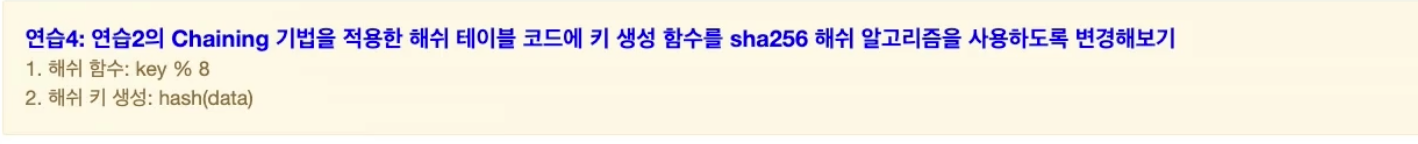

In [12]:
#키를 바꿔주는 것이므로 get_key를 손봐준다.

hash_table = list([0 for i in range(8)])

def get_key(data):
    hash_object = hashlib.sha256()
    hash_object.update(data.encode())
    hex_dig = hash_object.hexdigest()
    return int(hex_dig,16) #그냥 hex_dig은 문자열이므로 8로 나눌 수 없음. 따라서 16진수인 값을 10진수로 변환해준다. 

#주소값 생성함수
def hash_function(key):
    return key % 8

#저장함수
def save_data(data, value): 
    index_key = get_key(data) #충돌때문에 저장된건지 등등에 대한 확인을 위해 변수화.
    hash_address = hash_function(index_key) #index번호. 8로 나누기 때문에 0~7일거임
    if hash_table[hash_address] != 0: #자리에 이미 값이 들어있다면(default 값이 0이니까)
        #데이터가 내가 원하는 데이터인지 확인해야됨
        for index in range(hash_address ,len(hash_table)): # 지금 현 index부터 뒤로 움직이면서 확인
            if hash_table[index] == 0: #빈 공간이면 충돌 데이터를 저장해라!! 핵심 코드
                hash_table[index] = [index_key, value]
                return
            elif hash_table[index][0] == index_key: #동일한 키 다른 데이터 값이 이미 저장되어있다면 데이터를 업데이트해라.
                hash_table[index][1] = value
                return
    else:
        #만약 자리에 값이 없다면(해당 슬롯에 데이터가 저장된 적이 없다)
        hash_table[hash_address] = [index_key, value]

#값 읽어오는 함수
def read_data(data):
    index_key = get_key(data)
    #읽어올 주소를 생성
    hash_address = hash_function(index_key)
    
    
    if hash_table[hash_address] != 0:
        #데이터가 있다면 밑으로 내려가면서 빈자리 확인
        for index in range(hash_address, len(hash_table)): #충돌이 일어난 부분부터 아래에 저장되어있을 것이기에 밑으로 검색
            if hash_table[index] == 0: #index 0 번이 key일 때 : 한번도 저장된 적이 없는 데이터
                return None
            elif hash_table[index][0] == index_key: #우리가 원하는 찾는 값
                return hash_table[index][1]
    else:
        return None

In [34]:
print(get_key('d0') % 8)
print(get_key('dx') % 8)

3
3


In [35]:
save_data('d0','121233')
save_data('dx','12efff')
read_data('dx')

'12efff'

# 시간 복잡도

+ 일반적인 경우(충돌이 없는 경우) : 동일한 시간이 걸림(왜냐하면 어차피 주소로 찾아오는 것이기 떄문) : O(1)




+ 최악의 경우(충돌이 모두 발생하는 경우) : 모든 데이터 값이 다 같은 키 값을 가지는 경우 O(n)


+ "배열"에 데이터를 저장하고 검색할 때는 O(n), 해쉬는 O(1)